In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from shapely.geometry import Point
from shapely.geometry.polygon import LinearRing, Polygon
import folium


In [2]:
elementary = "C:/Users/HyeJee Yang/Desktop/district/elementary/(B100)국토통계_인구정보-초등학생 인구 수(전체)-기초구역_서울특별시_202010/nlsp_017001016.shp"
middle = "C:/Users/HyeJee Yang/Desktop/district/middle/(B100)국토통계_인구정보-중학생 인구 수(전체)-기초구역_서울특별시_202010/nlsp_017001019.shp"
high = "C:/Users/HyeJee Yang/Desktop/district/high/(B100)국토통계_인구정보-고등학생 인구 수(전체)-기초구역_서울특별시_202010/nlsp_017001022.shp"

In [3]:
#우리에게 필요한 데이터를 생성하자
elestudent = gpd.read_file(elementary)
midstudent = gpd.read_file(middle)
histudent = gpd.read_file(high)

join1 = elestudent.merge(midstudent, on='gid')
join2 = join1.merge(histudent, on = 'gid')
select = ['gid', 'val_x', 'val_y', 'val','geometry']
join2 = join2[select]
join2['totval'] = join2['val_x'] + join2['val_y'] + join2['val']
select2 = ['gid','totval','geometry']
geodf = join2[select2]

In [4]:
geodf.head()

,gid,totval,geometry
0,01000,10.0,"POLYGON ((956316.790 1965175.345, 956401.551 1..."
1,01001,63.0,"POLYGON ((957180.199 1962635.873, 957181.270 1..."
2,01002,189.0,"POLYGON ((956066.092 1963000.968, 956302.295 1..."
3,01003,155.0,"POLYGON ((956930.514 1962482.129, 956932.367 1..."
4,01004,77.0,"POLYGON ((956979.435 1962532.433, 956980.045 1..."


In [5]:
geodf.dtypes

gid           object
totval       float64
geometry    geometry
dtype: object

In [6]:
gdf = gpd.GeoDataFrame(geodf, geometry = 'geometry')

In [7]:
midaddress = pd.read_csv('C:/Users/HyeJee Yang/Desktop/school/gangnam.csv')
schools = pd.read_csv('C:/Users/HyeJee Yang/Desktop/school/schooldatabase.csv')

In [8]:
midaddress['gid'] = midaddress['gid'].astype(str)
schools['gid'] = schools['gid'].astype(str)

In [9]:
midaddress['zero'] = 0
midaddress['zero'] = midaddress['zero'].astype(str)
midaddress['prep'] = midaddress[['zero', 'gid']].apply(''.join, axis=1)
midaddress['gid'] = midaddress['prep']
del(midaddress['zero'])
del(midaddress['prep'])

In [10]:
schools['zero'] = 0
schools['zero'] = schools['zero'].astype(str)
schools['prep'] = schools[['zero', 'gid']].apply(''.join, axis=1)
schools['gid'] = schools['prep']
del(schools['zero'])
del(schools['prep'])

In [11]:
schools.head()

,code,gid
0,7091420,06328
1,7010058,06324
2,7091421,06321
3,7010059,06086
4,7010060,06324


In [12]:
midaddress

,gid,X,Y
0,06219,959880.7151,1944196.670
1,06219,959864.1654,1944233.109
2,06219,959854.5300,1944267.466
3,06216,959830.4520,1944346.196
4,06214,959698.5040,1944676.717
...,...,...,...
2464,06292,960458.8517,1943333.303
2465,06294,960627.5574,1943394.472
2466,06293,960651.0780,1943439.097
2467,06270,959274.8432,1943126.208


In [13]:
schoolmid = schools.merge(midaddress, on = 'gid')

In [14]:
schoolmid

,code,gid,X,Y
0,7010059,06086,960633.7705,1946168.325
1,7010059,06086,960554.2800,1946185.038
2,7010059,06086,960517.6699,1946222.438
3,7010520,06086,960633.7705,1946168.325
4,7010520,06086,960554.2800,1946185.038
...,...,...,...,...
336,7091455,06344,962879.0875,1943576.729
337,7010112,06009,959484.6022,1947887.057
338,7010112,06009,959514.9226,1947981.893
339,7010112,06009,959668.8628,1947649.881


In [15]:
school_mid = gpd.GeoDataFrame(
    schoolmid, geometry=gpd.points_from_xy(schoolmid.X, schoolmid.Y))
school_point = school_mid.drop(['X', 'Y'], axis = 1)

In [16]:
school_points = gpd.GeoDataFrame(school_point, geometry = 'geometry')
school_points

,code,gid,geometry
0,7010059,06086,POINT (960633.770 1946168.325)
1,7010059,06086,POINT (960554.280 1946185.038)
2,7010059,06086,POINT (960517.670 1946222.438)
3,7010520,06086,POINT (960633.770 1946168.325)
4,7010520,06086,POINT (960554.280 1946185.038)
...,...,...,...
336,7091455,06344,POINT (962879.088 1943576.729)
337,7010112,06009,POINT (959484.602 1947887.057)
338,7010112,06009,POINT (959514.923 1947981.893)
339,7010112,06009,POINT (959668.863 1947649.881)


In [17]:
school_point = school_points.drop_duplicates("code", keep="first")

In [18]:
school_point.dtypes

code           int64
gid           object
geometry    geometry
dtype: object

In [19]:
geopoint = geodf.merge(midaddress, on = 'gid')
geopoint = geopoint.drop(['geometry'], axis = 1)
geopoint

,gid,totval,X,Y
0,06000,595.0,957563.5597,1947369.052
1,06000,595.0,957679.7270,1947433.607
2,06001,692.0,958134.1111,1947548.280
3,06002,477.0,958211.0746,1948211.264
4,06003,168.0,958718.2728,1948250.341
...,...,...,...,...
2464,06377,214.0,965200.1404,1941340.941
2465,06377,214.0,965041.5339,1941047.303
2466,06378,203.0,965499.7272,1940898.889
2467,06378,203.0,965315.8412,1941531.776


In [20]:
geopoint = geopoint.fillna(0)

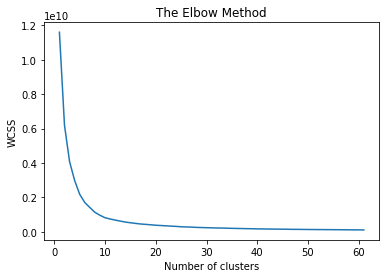

In [21]:
wcss = []
for i in range(1, 62):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(geopoint)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 62), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
kmeans = KMeans(n_clusters = 10, init = 'k-means++', random_state = 5,  max_iter=400)
y_kmeans = kmeans.fit_predict(geopoint)
k=pd.DataFrame(y_kmeans, columns=['cluster'])
geopoint_cluster=geopoint.join(k)

In [23]:
from geopandas import GeoDataFrame
geopoint_cluster = GeoDataFrame(geopoint_cluster)

In [24]:
geopoint_cluster.dtypes

gid         object
totval     float64
X          float64
Y          float64
cluster      int32
dtype: object

In [25]:
clustered = gpd.GeoDataFrame(
    geopoint_cluster, geometry=gpd.points_from_xy(geopoint_cluster.X, geopoint_cluster.Y))
clustered = clustered.drop(['X', 'Y'], axis = 1)

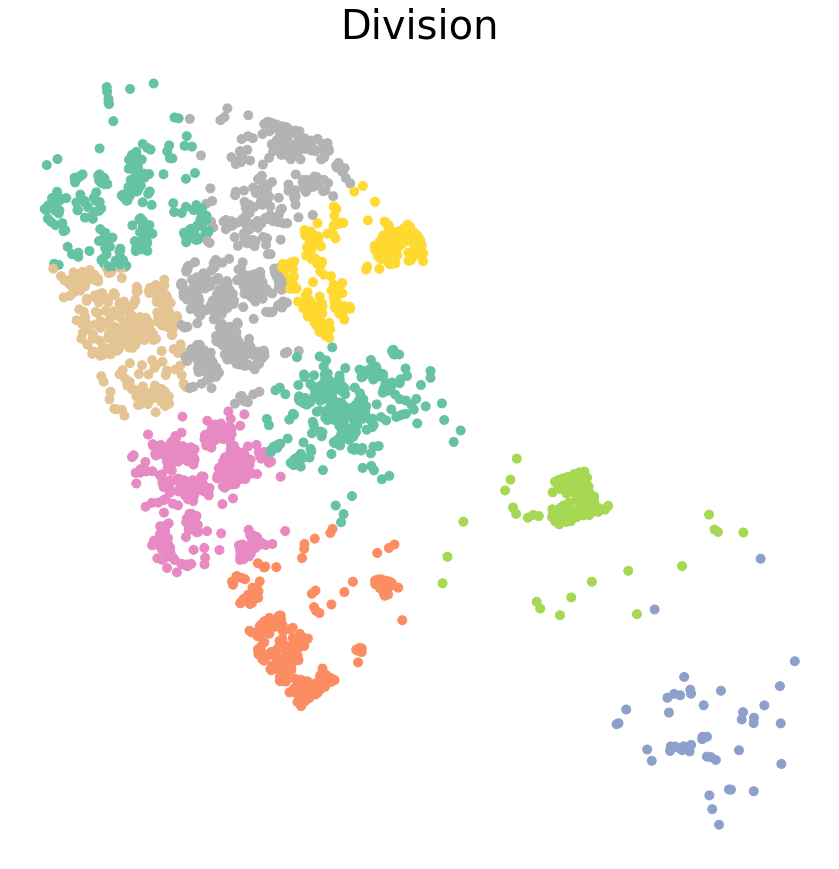

In [26]:
f, ax = plt.subplots(1, figsize=(20, 15))
ax.set_title("Division", fontsize=40)
ax.set_axis_off()
geopoint_cluster.plot(column='cluster',cmap='Set2', ax=ax, markersize=80)
plt.show()

In [27]:
#그러나 모든 point들이 같은 인구값을 갖는 것은 아니다. 따라서 weight를 추가하여 다시 knn을 시도한다.
#강남구 소재의 초중고 학교 수는 78개이다. 따라서 78개의 학교에서 모두 급식을 배달한다고 가정한다.
weight = geopoint['totval']
wkmeans = KMeans(n_clusters = 78, init = 'k-means++', random_state = 5,  max_iter=400)
y_wkmeans = wkmeans.fit_predict(geopoint, sample_weight = weight)
wk=pd.DataFrame(y_wkmeans, columns=['cluster'])
geopoint_weighted=geopoint.join(wk)

In [28]:
weighted = gpd.GeoDataFrame(
    geopoint_weighted, geometry=gpd.points_from_xy(geopoint_cluster.X, geopoint_cluster.Y))
weighted = weighted.drop(['X', 'Y'], axis = 1)

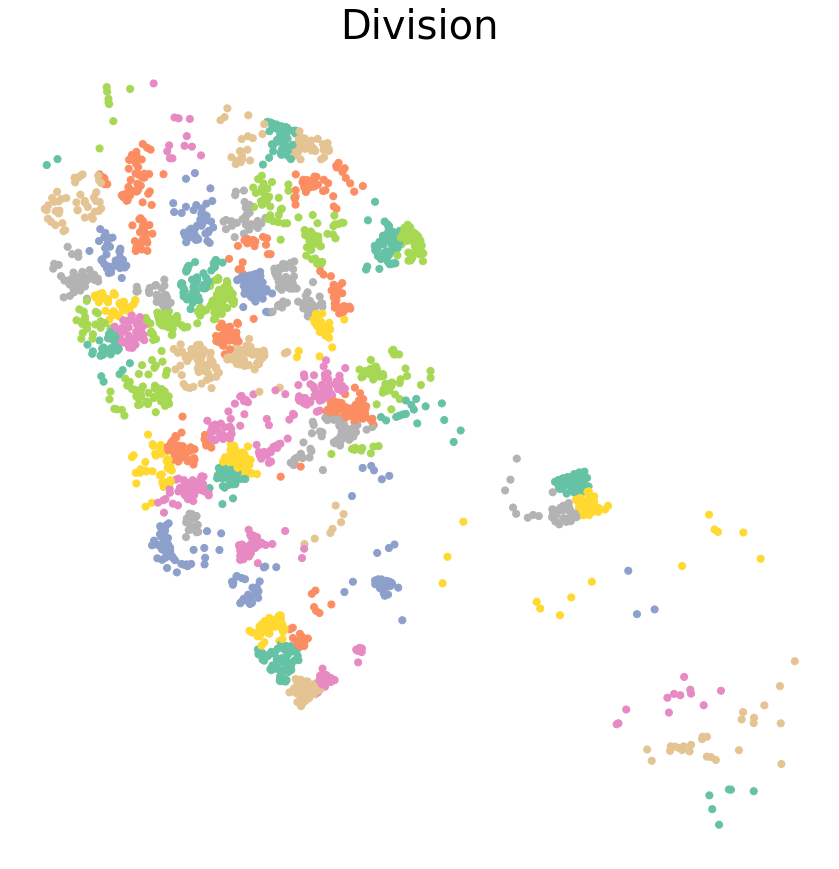

In [29]:
f, ax = plt.subplots(1, figsize=(20, 15))
ax.set_title("Division", fontsize=40)
ax.set_axis_off()
weighted.plot(column='cluster',cmap='Set2', ax=ax, markersize=50)
plt.show()

In [30]:
fin = weighted.merge(midaddress, on = 'gid')
fin = fin.drop(['X','Y'], axis = 1)
fin

,gid,totval,cluster,geometry
0,06000,595.0,8,POINT (957563.560 1947369.052)
1,06000,595.0,8,POINT (957563.560 1947369.052)
2,06000,595.0,8,POINT (957679.727 1947433.607)
3,06000,595.0,8,POINT (957679.727 1947433.607)
4,06001,692.0,46,POINT (958134.111 1947548.280)
...,...,...,...,...
41962,06378,203.0,61,POINT (965315.841 1941531.776)
41963,06378,203.0,61,POINT (965315.841 1941531.776)
41964,06378,203.0,61,POINT (965492.785 1941337.536)
41965,06378,203.0,61,POINT (965492.785 1941337.536)


In [31]:
last = fin.merge(geodf, on = 'gid')
last = last.drop(['totval_x', 'geometry_x'], axis = 1)
last['geometry'] = last['geometry_y']
last['totval'] = last['totval_y']
last = last.drop(['totval_y', 'geometry_y'], axis = 1)
last

,gid,cluster,geometry,totval
0,06000,8,"POLYGON ((957747.959 1947667.995, 957788.776 1...",595.0
1,06000,8,"POLYGON ((957747.959 1947667.995, 957788.776 1...",595.0
2,06000,8,"POLYGON ((957747.959 1947667.995, 957788.776 1...",595.0
3,06000,8,"POLYGON ((957747.959 1947667.995, 957788.776 1...",595.0
4,06001,46,"POLYGON ((957704.604 1948608.078, 957913.592 1...",692.0
...,...,...,...,...
41962,06378,61,"POLYGON ((965235.276 1941639.659, 965237.968 1...",203.0
41963,06378,61,"POLYGON ((965235.276 1941639.659, 965237.968 1...",203.0
41964,06378,61,"POLYGON ((965235.276 1941639.659, 965237.968 1...",203.0
41965,06378,61,"POLYGON ((965235.276 1941639.659, 965237.968 1...",203.0


In [32]:
last = gpd.GeoDataFrame(
    last, geometry='geometry')

In [49]:
last.dtypes

gid           object
cluster        int32
geometry    geometry
totval       float64
dtype: object